# Assignment for the Principles in Data Analytics

## Load the required packages

In [1]:
# Working with number arrays
import numpy as np
# Scientific computing
import scipy as sc
# Plotting
from matplotlib import pyplot as plt
# Color pallete
from matplotlib import colors  
# Plotting
import seaborn as sns
# Working with dataframes 
import pandas as pd
# Loading Iris dataset
import sklearn as sk

# Task 1: Source the Data Set  

1. Import the Iris data set from the sklearn.datasets module.
2. Explain, in your own words, what the load_iris() function returns.

## Import the Iris data set from the sklearn.datasets module

In [2]:
# Load the iris dataset  
# See: https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html

# Save the iris dataset in the iris object
iris = sk.datasets.load_iris()

## Explain, in your own words, what the load_iris() function returns

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The load_iris() function returns a dictionary-like object which contains multiple objects, including the iris dataset and metadata. The keys of this object are 'data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'.

# Task 2: Explore the Data Structure  
Print and explain:
1. the shape of the data set, 
2. the first and last 5 rows of the data, 
3. the feature names, 
4. and the target classes.

## The shape of the dataset

See  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html on how to obtain the shape of the pandas dataframe.  

In [4]:
# Display the shape of the Iris data
iris.data.shape

(150, 4)

The Iris dataset contains 150 rows (each sample is in a separate row) and 4 collums (each collumn corresponds to sepal length, sepal width, petal length and petal width).

## The first five rows

In [5]:
# Display the first 5 rows
iris.data[0:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

The dataset above contains info about sepal length, sepal width, petal length and petal width for the first 5 samples in the dataset.

## The last five rows

In [6]:
# Display the last five rows
iris.data[-5:len(iris.data),]

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

The dataset above contains info about sepal length, sepal width, petal length and petal width for the last 5 samples in the dataset.

## The feature names and target classess

This source (see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) was used to understand how to obtain feature names and target classess from the Iris dataset.  


In [7]:
# Display the feature names
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The feature_names object gives the explanation what does each collumn in the dataset represents.

In [8]:
# Display the sample types in the dataset
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The target_names shows what sample types are present in the dataset.

# Task 3: Summarize the Data
For each feature in the dataset, calculate and display:  
**mean  
minimum  
maximum  
standard deviation  
median**  

## Resources

The numpy package (see official documentation: https://numpy.org/doc/2.2/reference/arrays.ndarray.html) is used for working with a multidimensional, homogeneous array of fixed-size items. 


## Separate each feature in a separate list

The features of samples are stored in the iris.data object. This object is comprised of 150 lists composed of four values (see the cell below). Each list corresponds to a sample and each value corresponds to a feature arranged in this order: sepal length, sepal width, petal length and petal width. See the example of such a list in the below cell. However, in this exercise we have to calculate summary statistics for features. Although, we can't do this while the values for each feature are in a separate list.

We need to isolate all values for each feature into a separate list to calculate summary statistics. We can do this by transposing the iris.data object.  
  

In [9]:
# Display the shape of the Iris data
print(f"The shape of the iris.data is {iris.data.shape}")
print()

# Check the information for the first sample in the dataset
# The four values correspond to sepal length, sepal width, petal length and petal width
print(f"The list of the first sample {iris.data[0]}")


The shape of the iris.data is (150, 4)

The list of the first sample [5.1 3.5 1.4 0.2]


## Transposing the iris.data

In [10]:
# Transpose the iris dataset to separate all values for each feature in a separate list
iris_transposed = iris.data.transpose()


## Calculate summary statistics

See https://numpy.org/doc/stable//reference/routines.statistics.html to calculate mean, standard deviation, minima, maxima and median

Read https://docs.python.org/3/library/functions.html about built-in python round() function which is used to round numbers.

See https://www.w3schools.com/python/ref_string_replace.asp to replace a certain value in a string with another value

See https://numpy.org/doc/2.1/reference/generated/numpy.empty.html to create an empty numpy array

See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html to working with pandas df

See https://www.geeksforgeeks.org/enumerate-in-python/ to read about enumerate() function which allows to track the number of for loop iterations

In [11]:
# Define a function that computes summary statistics using the numpy
def summary_statistics(iris_transposed):
    
    # Obtain the feature names
    feature_names = iris.feature_names
    # Replace spaces in the feature names with an underscore
    feature_names = [name.replace(" ", "_") for name in feature_names]

    # Create an empty pandas dataframe 
    df = pd.DataFrame(np.empty((4,5)))
    # Set the index of df as feature names
    df.index = feature_names
    # Set the column names of df 
    df.columns = ["mean", "std", "minima", "maxima", "median"]
    
    # Go through each feature in the iris_transposed
    # and calculate summary statistics
    # Use enumerate() function to loop through the object
    # enumerate() outputs the # of iterations and individual values in the object
    for count, feature in enumerate(iris_transposed):
        df.loc[feature_names[count], "mean"] = round(np.mean(feature), 2) # Compute mean
        df.loc[feature_names[count], "std"] = round(np.std(feature), 2) # Compute standard deviation
        df.loc[feature_names[count], "minima"] = round(np.min(feature), 2) # Compute the minimum
        df.loc[feature_names[count], "maxima"] = round(np.max(feature), 2) # Compute the maxima
        df.loc[feature_names[count], "median"] = round(np.median(feature), 2) # Compute the median

    return df

In [12]:
# Display summay statistics for each feature in pandas df
sum_stats = summary_statistics(iris_transposed)
sum_stats

,mean,std,minima,maxima,median
sepal_length_(cm),5.84,0.83,4.3,7.9,5.80
sepal_width_(cm),3.06,0.43,2.0,4.4,3.00
petal_length_(cm),3.76,1.76,1.0,6.9,4.35
petal_width_(cm),1.20,0.76,0.1,2.5,1.30


# Task 4: Visualize Features
1. Plot histograms for each feature using matplotlib.  
2. Add appropriate titles and axis labels.

See https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/ and https://matplotlib.org/stable/gallery/statistics/hist.html for histogram plotting

See https://www.w3schools.com/python/ref_string_capitalize.asp for string capitalisation   

See https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html#sphx-glr-users-explain-axes-constrainedlayout-guide-py for plotting subplots with matplotlib

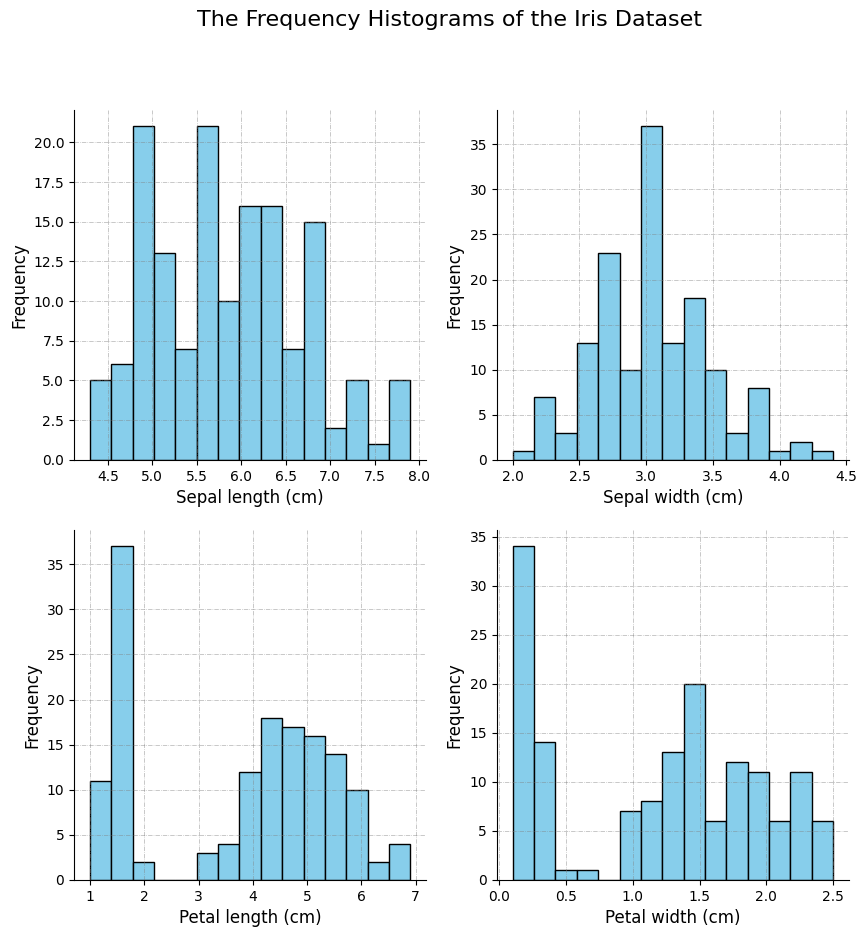

In [13]:
# Get the feature names
feature_names = iris.feature_names

# Define a layout of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Go through each axis in the previously defined layout 
# and plot a histogram of each feature
for count, ax in enumerate(axs.flat):
    
    # Remove axes splines 
    for s in ['top', 'right']: 
        ax.spines[s].set_visible(False) 
    
    # Add x, y gridlines 
    ax.grid(color ='grey', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.6) 

    # Plot a histogram of the feature
    ax.hist(iris_transposed[count], bins=15, 
                    color='skyblue', edgecolor='black')
    
    # Set the names of x and y axis and title
    ax.set_xlabel(f"{feature_names[count].capitalize()}", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

# Set the title
fig.suptitle('The Frequency Histograms of the Iris Dataset', fontsize=16)
# Show the plot
plt.show()

# Task 5: Investigate Relationships  
1. Choose any two features from the data set and create a scatter plot of them.  
2. Color-code the three different classes of the scatter plot points.

In [14]:
# See https://www.geeksforgeeks.org/convert-numpy-array-to-dataframe/ on how to convert numpy array to pandas df 
df = pd.DataFrame(iris.data)

In [15]:
# So far I have a df with 150 rows and 4 columns
df.shape

(150, 4)

In [16]:
# See https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ on how to rename columns in df 

# Set the column names as feature names
# p.s. the space in the feature_names is replaced by underscore
df.columns = [feature.replace(" ", "_") for feature in iris.feature_names]
df.columns

Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)'],
      dtype='object')

## Adding new columns to a df

I have created a df with iris.data. Although, I need to add metadata of samples. In the following code, I will create two columns to do so. Firstly, I will create a new column with iris.target where 0 = setosa, 1 = versicolor, 2 = virginica. Then, I will use this columnd to create an additional column using the inherent df function called apply() that can create a new column based on another column values.

See https://saturncloud.io/blog/how-to-create-new-values-in-a-pandas-dataframe-column-based-on-values-from-another-column/#:~:text=To%20create%20the%20new%20column,and%20returns%20the%20corresponding%20category.  
https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html on how to create a new column in pandas df based on already existing columns  

In [17]:
# I will create a new column using iris.target
# which contains infor about the type of a sample
# 0 = setosa, 1 = versicolor, 2 = virginica
# p.s. the length of iris.target must be the same
# as the row # of the df 
print(len(iris.target))

target_names = iris.target_names
print(target_names)

150
['setosa' 'versicolor' 'virginica']


In [18]:
# Create a new column target which stores the target values of a sample
df["target"] = iris.target

In [19]:
# Define the function to categorize target names
def categorize_class(aclass):
    
    if aclass == 0:
        return target_names[0] # setosa
    elif aclass == 1:
        return target_names[1] # versicolor
    else:
        return target_names[2] # virginica

See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html on how to use pandas apply() function which takes as the input a column loops each cell through a given function

In [20]:
# Use apply and categorize_class functions to create a new column in a dataframe
# while using a "target" column as a reference
df["species"] = df["target"].apply(categorize_class)

In [21]:
# Check out the first five rows of the final df
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Plotting a scatterplot

Here I will plot three scatter plots of petal_length and petal_width for each feature. This will allow me to colour code data points by species

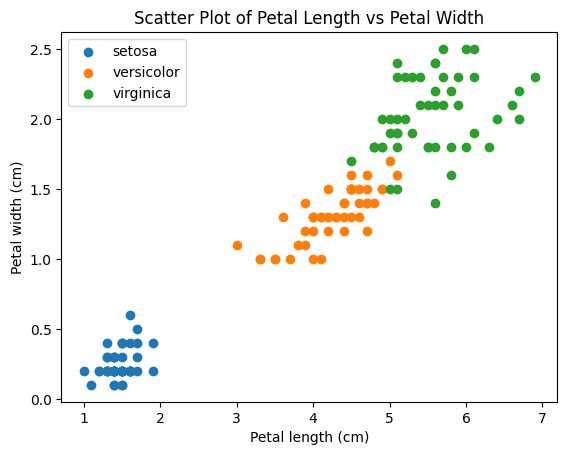

In [22]:
# Plot three scatter plots for each type
for name in iris.target_names:
    
    # Create a temporary df with details for a single type 
    temp_df = df[df["species"] == name]
    
    # Select x and y cordinates as petal length and width, resptectively
    x = temp_df["petal_length_(cm)"]
    y = temp_df["petal_width_(cm)"]
    
    # Plot a scatter plot with previously defined cordinates and
    # use type name as the label of the legend
    plt.scatter(x, y, label=name)

# Set a legend
plt.legend(target_names)

# Name x and y axes and set the title of the plot
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.show()

# Task 6: Analyze Relationship
1. Use numpy.polyfit to add a regression line to the scatter plot from Task 5.

See https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html on how to use numpy.plofit() function

See https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html on how to create a polynomial numpy matrix 

See https://www.statology.org/matplotlib-remove-frame/ on how to remove frames from a figure

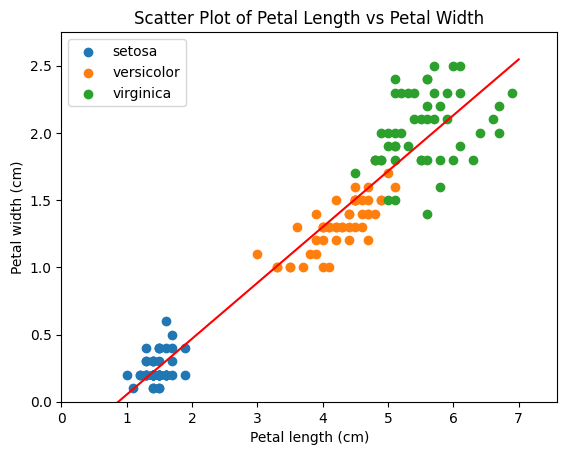

In [23]:
# Plot three scatter plots for each type
for name in iris.target_names:
    
    # Create a temporary df with details for a single type 
    temp_df = df[df["species"] == name]
    
    # Select x and y cordinates to petal length and width, resptectively
    x = temp_df["petal_length_(cm)"]
    y = temp_df["petal_width_(cm)"]
    
    # Plot a scatter plot with previously defined cordinates and
    # use type name as the label of the legend
    plt.scatter(x, y, label=name)
    

# Set the x and y cordinates to petal length and width, resptectively
x = df["petal_length_(cm)"]
y = df["petal_width_(cm)"]

# Create the cordinates of the regression line using np.polyfit and np.poly1d functions
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Create a dataset with hundred values that range between 0 and 7
xp = np.linspace(0, 7, 100)
# Plot the regression line
_ = plt.plot(xp, p(xp), color='red')

# Set the limits for the x and y axes where the bottom limit is 0 for both axes
# and the highest value is the largest cordinate + 10% of it.
plt.ylim(0, (y.max() + (y.max()*.1)))
plt.xlim(0, (x.max() + (x.max()*.1)))
    
# Store type names in a list
target_names = iris.target_names.tolist()

# Set a legend
plt.legend(target_names)

# Name x and y axes and set the title of the plot
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Scatter Plot of Petal Length vs Petal Width")

# Remove right and top frames from the plot
for s in ['axes.spines.top', 'axes.spines.right']: 
    plt.rcParams[s] = False

# Show the plot
plt.show()

# Task 7: Analyze Class Distributions
1. Create box-plots of the petal lengths for each of the three classes.

See https://seaborn.pydata.org/generated/seaborn.boxplot.html on how to create a boxplot with seaborn  
  
See https://stackoverflow.com/questions/71459836/how-to-color-each-boxplot-differently#:~:text=artists%20.-,The%20recommended%20way%20to%20change%20the%20colors%20in%20Seaborn%20is,or%20a%20list%20of%20colors on how to color each box with a different color

Text(0.5, 1.0, 'The boxplot of the petal length by species')

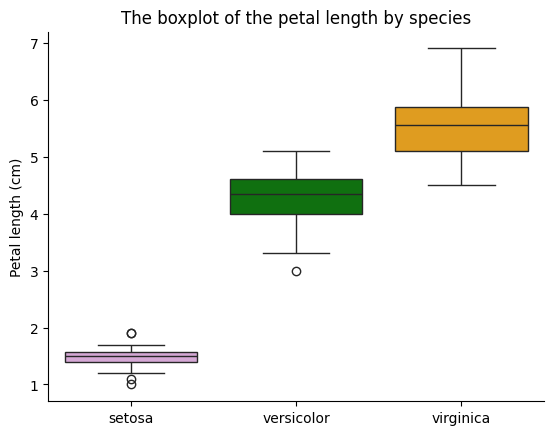

In [24]:
# Create a colour palette to color code boxes
palette = ['plum', 'g', 'orange']

# Create a boxplot
boxplot = sns.boxplot(data=df, x="species", y="petal_length_(cm)", hue='species', palette=palette
                     )
plt.xlabel(None)
plt.ylabel("Petal length (cm)")
plt.title("The boxplot of the petal length by species")

# Task 8: Compute Correlations
1. Calculate the correlation coefficients between the features.  
2. Display the results as a heatmap using matplotlib.


## Calculating correlation matrix with inherented pandas df function corr()

In [25]:
# Exclude columns in a pandas df  
# https://www.geeksforgeeks.org/how-to-exclude-columns-in-pandas/ 

# Calculate the correlation matrix  
# https://stackoverflow.com/questions/39409866/correlation-heatmap  

corr = df.drop(columns=["target", "species"]).corr()

In [26]:
# Round the numbers in numpy array  
# https://www.programiz.com/python-programming/numpy/methods/round 

corr = np.array(corr)
corr = np.round(corr, 2)

## Fill diagonal and upper half with NaNs

The upper and the bottom right and left corners, respectively, of the correlation matrix are the mirror representation of each other. They give the same information. Therefore, we need to see only a one of them in the graph to exclude redundant information and make the plot easy to read. Therefore, here I will fill the upper right top triangle of the correlation matrix with nan values so that the upper right portion of the correlation matrix graph would be empty. 

In [27]:
# Create a numpy array, with zero values, of the same size as the input  
# https://numpy.org/doc/2.2/reference/generated/numpy.zeros_like.html  
mask = np.zeros_like(corr, dtype=bool)

# Set the numbers of right-upper triangle of a numpy array to a certain value  
# https://numpy.org/doc/2.1/reference/generated/numpy.triu_indices_from.html  
mask[np.triu_indices_from(mask, k=1)] = True
corr[mask] = np.nan

## Plot the correlation matrix

In [28]:
[feature.replace(" (cm)", "").capitalize() for feature in iris.feature_names]

['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

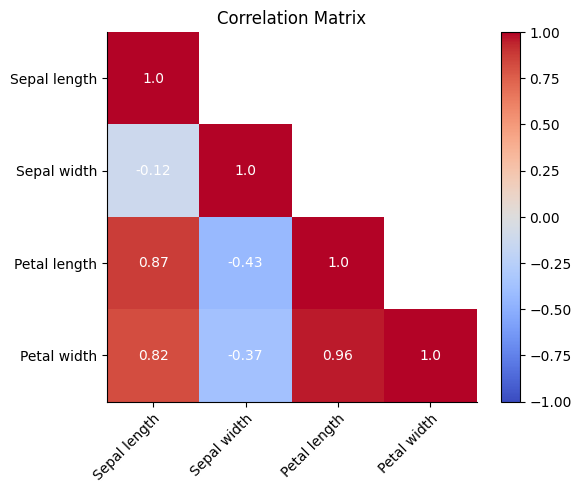

In [29]:
# Setting up the color bar  
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html  
# Examples of a color palette  
# https://matplotlib.org/stable/users/explain/colors/colormaps.html 

# Set the minimum and maximum values in a colour bar
vmax = 1
vmin = -1
# Create a pseudocolour image
cax = plt.imshow(corr, cmap="coolwarm", vmin=vmin, vmax=vmax)

# Add a colorbar 
cbar = plt.colorbar(cax)


# Get the feature names from the iris.feature_names
# Replace (cm) with empty string and capitalise the string
features = [feature.replace(" (cm)", "").capitalize() for feature in iris.feature_names]


# Show all ticks and label them with the respective list entries
plt.xticks(range(len(features)), labels=features,
               rotation=45, ha="right", rotation_mode="anchor")
plt.yticks(range(len(features)), labels=features)


# Loop over data dimensionss and create text annotations.
for i in range(len(features)):
    for j in range(len(features)):
        text = plt.text(j, i, corr[i, j],
                       ha="center", va="center", color="w")


# Set the title
plt.title("Correlation Matrix")
# Show the plot
plt.show()

# Task 9: Fit a Simple Linear Regression
1. For your two features in Task 5, calculate the coefficient of determination R<sup>2</sup>.  
2. Re-create the plot from Task 6 and annotate it with the R<sup>2</sup> value.


### References
Calculate R  
https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-calculate-a-regression-line-169795/  
Calculate R^2  
https://www.youtube.com/watch?v=lng4ZgConCM&t=6s  

$R^{2}$ can be calculated using the following formula: $R^{2} = 1- SS_{res} / SS_{tot}$ or simply squaring R, obtained in the previous steps. However, I will calculate the $R^{2}$ in the hardway (first instance) to show a deeper understanding.

## Calculate $R^{2}$

In [30]:
# Show sum_stats df
sum_stats

,mean,std,minima,maxima,median
sepal_length_(cm),5.84,0.83,4.3,7.9,5.80
sepal_width_(cm),3.06,0.43,2.0,4.4,3.00
petal_length_(cm),3.76,1.76,1.0,6.9,4.35
petal_width_(cm),1.20,0.76,0.1,2.5,1.30


In [31]:
# Get the mean of petal_length
x_mean = sum_stats.loc["petal_length_(cm)", "mean"]
# Get the std of petal_length
x_std = sum_stats.loc["petal_length_(cm)", "std"]

# Get the mean of petal_width
y_mean = sum_stats.loc["petal_width_(cm)", "mean"]
# Get the std of petal_width
y_std = sum_stats.loc["petal_width_(cm)", "std"]

# Get the R value of the petal length vs petal width
r = corr[3][2]

# Get the slope of the regression line
m = r * (y_std / x_std)

# Get the intercept of the regression line
b = y_mean - m*x_mean

print(f"""
Slope (m) = {m}

Intercept (b) = {b}
""")
print()
print(f"The formula of the regression line: y = {round(m, 2)}x + {round(b, 2)}")


Slope (m) = 0.41454545454545455

Intercept (b) = -0.35869090909090917


The formula of the regression line: y = 0.41x + -0.36


In [32]:
# Define a function which will calculate R^2
def rsquared(x, y):
    
    # Get the sum of residual sum of squares
    SE_line = 0
    for i in range(len(x)):
        SE_line += (y[i] - (m*x[i] + b))**2
    
    # Get the sum of total sum of squares
    SE = 0
    for i in range(len(y)):
        SE += (y[i] - y_mean)**2
    
    # Use the formula to get R^2
    r_squared = 1 - (SE_line / SE)
    
    return r_squared

In [33]:
# Calculate R^2
r_squared = rsquared(x, y)
r_squared = round(r_squared, 2)

## Plot $R^{2}$

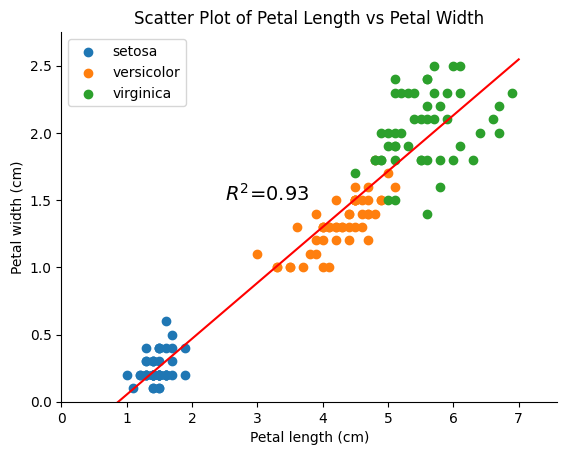

In [34]:
# Plot three scatter plots for each type
for name in iris.target_names:
    
    # Create a temporary df with details for a single type 
    temp_df = df[df["species"] == name]
    
    # Select x and y cordinates to petal length and width, resptectively
    x = temp_df["petal_length_(cm)"]
    y = temp_df["petal_width_(cm)"]
    
    # Plot a scatter plot with previously defined cordinates and
    # use type name as the label of the legend
    plt.scatter(x, y, label=name)
    

# Set the x and y cordinates to petal length and width, resptectively
x = df["petal_length_(cm)"]
y = df["petal_width_(cm)"]

# Create the cordinates of the regression line using np.polyfit and np.poly1d functions
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Create a dataset with hundred values that range between 0 and 7
xp = np.linspace(0, 7, 100)
# Plot the regression line
_ = plt.plot(xp, p(xp), color='red')

# Set the limits for the x and y axes where the bottom limit is 0 for both axes
# and the highest value is the largest cordinate + 10% of it.
plt.ylim(0, (y.max() + (y.max()*.1)))
plt.xlim(0, (x.max() + (x.max()*.1)))
    
# Store type names in a list
target_names = iris.target_names.tolist()

# Set a legend
plt.legend(target_names)

# Name x and y axes and set the title of the plot
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Scatter Plot of Petal Length vs Petal Width")


# See https://www.geeksforgeeks.org/add-text-inside-the-plot-in-matplotlib/ on how to add text in figure
# Add text inside the plot
plt.text(2.5, 1.5, f'$R^{2}$={r_squared}', fontsize = 14)


# Remove right and top frames from the plot
for s in ['axes.spines.top', 'axes.spines.right']: 
    plt.rcParams[s] = False

# Show the plot
plt.show()

# Task 10: Too Many Features
1. Use seaborn to create a pairplot of the data set.  
2. Explain, in your own words, what the pairplot depicts.

The theory of Pairplots  
https://www.analyticsvidhya.com/blog/2024/02/pair-plots-in-machine-learning/  
Pairplots explained in seaborn   
https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [35]:
# Check out the df
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [36]:
# Remove the target column
df_sub = df.loc[ : , df.columns!="target"]

# Set different collumn names for plotting
df_sub.columns = [feature.replace(" (cm)", "").capitalize() for feature in iris.feature_names] + ["Species"]

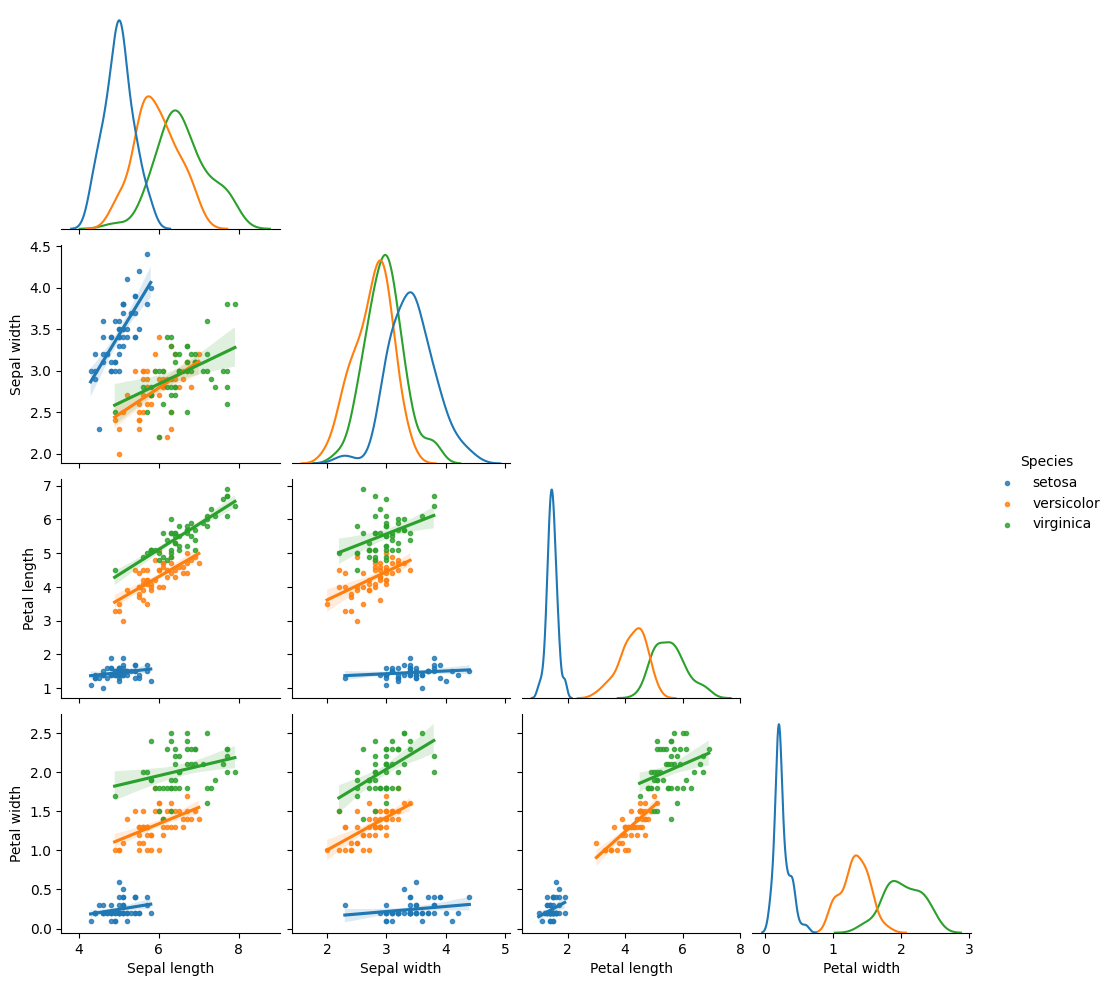

In [37]:
# Define keyword arguments for customisation
scatter_kws = dict(marker=".")

# Plot a pairplot
sns.pairplot(df_sub, hue="Species", diag_kind = "auto", corner=True, kind="reg",
             diag_kws=dict(fill=False), plot_kws=scatter_kws
            )

## How I understand pairplots?

1. Pairplots are an explanatory data analysis (EDA) tool that allows to see relationships between two features or subpopulations within those features, the distribution of a single feature, and detect outliers.

2. It is important to examine the data in the EDA and see possible trends, relationships and outliers in the dataset. Such analysis may highight important correlations between features or even weaknessess of the dataset such as outliers that can spotlight wrong measurements or interesting outliers.

3. Histograms can show multiple underlying subpopulations in the dataset and distribution.
Scatter plots can show relationships between variables and their variance.

4. Such insights allows to select the best features that will explain the difference between subpopulations and group or exclude certain features that has high correlation and does not differentiate between subpopulations.